## Kyle Calabro
## Dr. Tweneboah
## CMPS 620 - Homework Three: Part B
## 19 March 2021
-----

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager

from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest
from sklearn import svm

## Part One: Generating the Data Sets

In [2]:
X1, y1 = make_blobs(n_samples = 1000, centers = ((4, -4), (0, 0)), random_state = 42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))

X2, y2 = make_blobs(n_samples = 250, centers = 1, random_state = 42)
X2 = X2 + [6, -8]

X = np.r_[X1, X2]
y = np.r_[y1, y2]

# Gaussian Mixture Model
----

## Part Two: Train a Gaussian Mixture Model (GMM) to the Data Set X

### Find optimal number of components via BIC/AIC

In [9]:
gms_per_k = [GaussianMixture(n_components = k, n_init = 10, random_state=42).fit(X)
             for k in range(1, 11)]
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

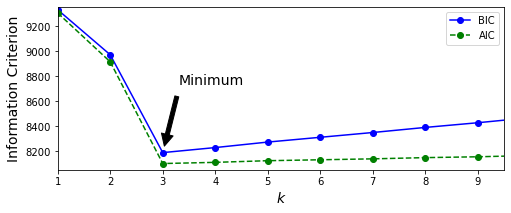

In [30]:
plt.figure(figsize = (8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize = 14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy = (3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords = 'figure fraction',
             fontsize = 14,
             arrowprops = dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

### Now, train the model accordingly...

In [26]:
gmm = GaussianMixture(n_components = 3, n_init = 10, random_state = 42)
gmm.fit(X);

## Part Three: Identifying Defective Products with Third Percentile Lowest Density as Threshold

In [27]:
densities = gmm.score_samples(X)
density_threshold = np.percentile(densities, 3)
anomalies = X[densities < density_threshold]

## Part Four: Plot the Anomaly Detection

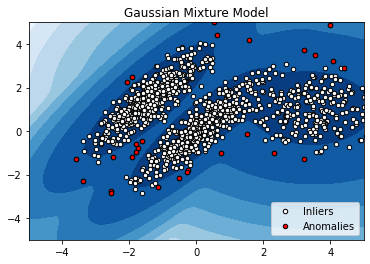

In [28]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))

Z = -gmm.score_samples(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Gaussian Mixture Model")
plt.contourf(xx, yy, Z, cmap = plt.cm.Blues_r)

b = plt.scatter(X[:, 0], X[:, 1], c = 'white', s = 20, edgecolor = 'k')

c = plt.scatter(anomalies[:, 0], anomalies[:, 1], c = 'red', s = 20, edgecolor = 'k')
plt.axis('tight')

plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b, c], ["Inliers", "Anomalies"], loc = "lower right")
plt.show();

# Isolation Forest
---

In [17]:
clf_IF = IsolationForest(max_samples = 100, random_state = 42)
clf_IF.fit(X);

In [18]:
densities = clf_IF.score_samples(X)
density_threshold = np.percentile(densities, 3)
anomalies = X[densities < density_threshold]

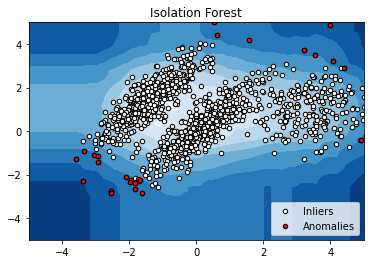

In [19]:
x, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf_IF.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Isolation Forest")
plt.contourf(xx, yy, Z, cmap = plt.cm.Blues_r)

b = plt.scatter(X[:, 0], X[:, 1], c = 'white', s = 20, edgecolor = 'k')

c = plt.scatter(anomalies[:, 0], anomalies[:, 1], c = 'red', s = 20, edgecolor = 'k')
plt.axis('tight')

plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b, c], ["Inliers", "Anomalies"], loc = "lower right")
plt.show();

# One Class SVM
---

In [20]:
clf_SVM = svm.OneClassSVM(nu = 0.1, kernel = "rbf", gamma = 0.1)
clf_SVM.fit(X);

In [21]:
densities = clf_SVM.score_samples(X)
density_threshold = np.percentile(densities, 3)
anomalies = X[densities < density_threshold]

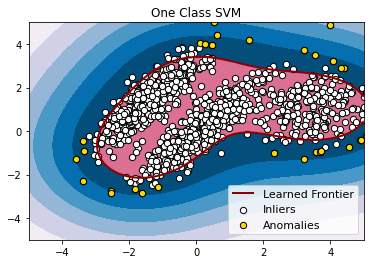

In [22]:
Z = clf_SVM.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("One Class SVM")
plt.contourf(xx, yy, Z, levels = np.linspace(Z.min(), 0, 7), cmap = plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels = [0], linewidths = 2, colors = 'darkred')
plt.contourf(xx, yy, Z, levels = [0, Z.max()], colors = 'palevioletred')

s = 40
b = plt.scatter(X[:, 0], X[:, 1], c = 'white', s = s, edgecolors = 'k')
c = plt.scatter(anomalies[:, 0], anomalies[:, 1], c = 'gold', s = s, edgecolors = 'k')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))

plt.legend([a.collections[0], b, c],
           ["Learned Frontier", "Inliers", "Anomalies"],
           loc = "lower right", prop = matplotlib.font_manager.FontProperties(size = 11))
plt.show();